In [1]:
import pandas as pd
import numpy as np

## 데이터 전처리
- 연속형
1. age : 나이<br>
2. stat_overall : 선수의 현재 능력치 입니다.<br>
3. stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.<br>
4. value(예측값) : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다<br>
- 이산/범주형
1. continent : 선수들의 국적이 포함되어 있는 대륙입니다<br>
2. contract_until(전처리 필요) : 선수의 계약기간이 언제까지인지 나타내어 줍니다<br>
3. position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등<br>
4. prefer_foot : 선수가 선호하는 발입니다. ex) 오른발<br>
5. reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수<br>
6. stat_skill_moves : 선수의 개인기 능력치 입니다.<br>
- 정리에서 제외한 변수
1. id : 선수 고유의 아이디<br>
2. name : 이름<br>

In [2]:
train = pd.read_csv('FIFA_train.csv',encoding = 'utf-8') # train data
test = pd.read_csv("FIFA_test.csv",encoding = 'utf-8') # test data

In [3]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [4]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [5]:
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [6]:
train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

<AxesSubplot:>

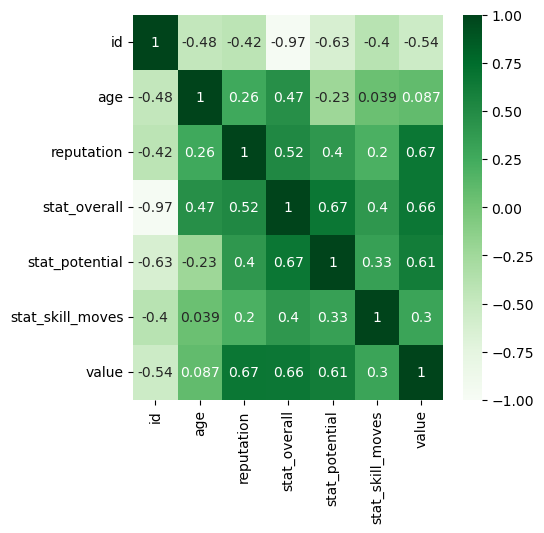

In [7]:
#heatmap으로 상관관계를 표시
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(train.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [8]:
train = train.drop(['id', 'name'], axis=1)
test = test.drop(['id', 'name'], axis=1)

In [9]:
class ArrayChanger:
    def __init__(self):
        pass

    def replace_value(self, year, arr):
        for i in range(len(arr)):
            if str(year) in arr[i]:
                arr[i] = str(year)
        return arr

    def replace_all(self, arr):
        print("Replaced array for 2018: ", self.replace_value(2018, arr))
        print("Replaced array for 2019: ", self.replace_value(2019, arr))
        print("Replaced array for 2020: ", self.replace_value(2020, arr))

ac = ArrayChanger()
ac.replace_all(train['contract_until'])
ac.replace_all(test['contract_until'])

/tmp/ipykernel_79104/2915400597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = str(year)


Replaced array for 2018:  0       2021
1       2020
2       2021
3       2020
4       2021
        ... 
8927    2019
8928    2020
8929    2021
8930    2021
8931    2020
Name: contract_until, Length: 8932, dtype: object
Replaced array for 2019:  0       2021
1       2020
2       2021
3       2020
4       2021
        ... 
8927    2019
8928    2020
8929    2021
8930    2021
8931    2020
Name: contract_until, Length: 8932, dtype: object
Replaced array for 2020:  0       2021
1       2020
2       2021
3       2020
4       2021
        ... 
8927    2019
8928    2020
8929    2021
8930    2021
8931    2020
Name: contract_until, Length: 8932, dtype: object
Replaced array for 2018:  0       2022
1       2022
2       2023
3       2020
4       2020
        ... 
3823    2021
3824    2018
3825    2021
3826    2020
3827    2021
Name: contract_until, Length: 3828, dtype: object
Replaced array for 2019:  0       2022
1       2022
2       2023
3       2020
4       2020
        ... 
3823    2021
3824   

In [10]:
# 데이터 분할 (X, y)
X = train.drop(['value'], axis=1)
y = train['value']
print(X.shape)
print(y.shape)

display(X.head())
display(y.head())

(8932, 9)
(8932,)


,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,31,south america,2021,ST,left,5.0,94,94,4.0
1,27,europe,2020,GK,right,4.0,91,93,1.0
2,31,south america,2021,ST,right,5.0,91,91,3.0
3,32,europe,2020,DF,right,4.0,91,91,3.0
4,25,europe,2021,GK,right,3.0,90,93,1.0


0    110500000.0
1     72000000.0
2     80000000.0
3     51000000.0
4     68000000.0
Name: value, dtype: float64

In [11]:
# 데이터 분할 (학습데이터, 평가데이터)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.3, random_state = 1, shuffle=True, stratify = X["reputation"]
)
print(X.shape)
print(X_train.describe())
print(X_test.describe())

(8932, 9)
               age   reputation  stat_overall  stat_potential  \
count  6252.000000  6252.000000   6252.000000     6252.000000   
mean     25.211292     1.131158     67.129239       72.005598   
std       4.606546     0.424880      6.781169        5.977626   
min      16.000000     1.000000     47.000000       48.000000   
25%      22.000000     1.000000     63.000000       68.000000   
50%      25.000000     1.000000     67.000000       72.000000   
75%      28.000000     1.000000     72.000000       76.000000   
max      40.000000     5.000000     94.000000       94.000000   

       stat_skill_moves  
count       6252.000000  
mean           2.405310  
std            0.772771  
min            1.000000  
25%            2.000000  
50%            2.000000  
75%            3.000000  
max            5.000000  
               age   reputation  stat_overall  stat_potential  \
count  2680.000000  2680.000000   2680.000000     2680.000000   
mean     25.204104     1.130224     67.0

In [12]:
# X_train = train.drop(['value'], axis=1)
# y_train = train['value']
# print(X_train.shape)
# print(y_train.shape)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6252 entries, 8091 to 6972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               6252 non-null   int64  
 1   continent         6252 non-null   object 
 2   contract_until    6252 non-null   object 
 3   position          6252 non-null   object 
 4   prefer_foot       6252 non-null   object 
 5   reputation        6252 non-null   float64
 6   stat_overall      6252 non-null   int64  
 7   stat_potential    6252 non-null   int64  
 8   stat_skill_moves  6252 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 488.4+ KB


In [14]:
X_train

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
8091,22,europe,2022,DF,right,1.0,58,69,2.0
6956,19,south america,2021,MF,left,1.0,62,77,2.0
6348,23,south america,2021,MF,right,1.0,63,67,2.0
6223,18,south america,2021,DF,left,1.0,64,77,3.0
2005,25,south america,2023,DF,right,1.0,72,77,2.0
...,...,...,...,...,...,...,...,...,...
6484,28,asia,2021,GK,right,1.0,63,63,1.0
2239,26,south america,2019,MF,right,1.0,72,73,3.0
1228,30,south america,2020,DF,right,1.0,74,74,3.0
6013,19,europe,2020,ST,right,1.0,64,80,3.0


In [15]:
X_train['contract_until'].value_counts()

2019    2059
2021    1624
2020    1394
2022     540
2023     348
2018     275
2024       9
2025       2
2026       1
Name: contract_until, dtype: int64

In [17]:
X_train['continent'].value_counts()

europe           3749
south america    1345
asia              533
africa            499
oceania           126
Name: continent, dtype: int64

In [18]:
X_train['position'].value_counts()

MF    2400
DF    1945
ST    1220
GK     687
Name: position, dtype: int64

In [19]:
X_train['prefer_foot'].value_counts()

right    4735
left     1517
Name: prefer_foot, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 

# 수치형 / 범주형 변수 선언
num_var = X_train.select_dtypes(include=np.number).columns.tolist()
cat_var = X_train.select_dtypes(exclude=np.number).columns.tolist()

# 수치형 변수 전처리를 위한 파이프라인 설정
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

# 범주형 변수 전처리를 위한 파이프라인 설정
cat_pipeline = Pipeline([
        ('encoder', OneHotEncoder(sparse=False, drop='if_binary'))
    ])

# 수치형 / 범주형 변수에 대한 자동 전처리를 위한 파이프라인 설정

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_var),
        ("cat", cat_pipeline, cat_var)])

X_train_pretained = full_pipeline.fit_transform(X_train)

In [21]:
full_pipeline.fit(X_train)
full_pipeline.transform(X_test)

array([[-0.69717077, -0.30871884, -0.90393394, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.38832798,  2.04507404,  2.48808288, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38832798, -0.30871884, -0.60897595, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.48007102, -0.30871884, -0.75645494, ...,  0.        ,
         0.        ,  0.        ],
       [-0.91427052,  2.04507404,  1.01329296, ...,  1.        ,
         0.        ,  1.        ],
       [-0.48007102, -0.30871884, -0.46149696, ...,  0.        ,
         1.        ,  1.        ]])

In [22]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression(fit_intercept=True, n_jobs=None)
model_linear.fit(X_train_pretained, y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# 평가 데이터에 대한 전처리
X_test_prepared = full_pipeline.transform(X_test)  

# 평가 데이터에 대한 예측
y_test_hat = model_linear.predict(X_test_prepared)

# 평가 데이터에 대한 평가
mse_linear = mean_squared_error(y_test, y_test_hat, squared=True) # mean squared error
rmse_linear = mean_squared_error(y_test, y_test_hat, squared=False) # root mean squared error
mae_linear = mean_absolute_error(y_test, y_test_hat) # mean absolute error
mape_linear = mean_absolute_percentage_error(y_test, y_test_hat) # mean absolute error

print(f'mse_linear:{mse_linear}')
print(f'rmse_linear:{rmse_linear}')
print(f'mae_linear:{mae_linear}')
print(f'mape_linear:{mape_linear}')

mse_linear:12548377653971.838
rmse_linear:3542368.932504326
mae_linear:1886244.3376681372
mape_linear:4.897755909300836
